<a href="https://colab.research.google.com/github/Syed-Azeemuddin/Dogs-vs-Cats/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:24<00:00, 52.5MB/s]
100% 1.06G/1.06G [00:24<00:00, 46.3MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('./content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout 

In [11]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory='/content/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#Normalize

def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [14]:
#Model

model = Sequential()


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(2,2),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 batch_normalization_4 (Batc  (None, 126, 126, 64)     256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 [==============================] - 83s 109ms/step - loss: 1.1254 - accuracy: 0.6259 - val_loss: 0.5650 - val_accuracy: 0.6966
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5143 - accuracy: 0.7488 - val_loss: 0.5007 - val_accuracy: 0.7494
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4433 - accuracy: 0.7957 - val_loss: 0.4616 - val_accuracy: 0.7870
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3943 - accuracy: 0.8217 - val_loss: 0.4590 - val_accuracy: 0.8008
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3267 - accuracy: 0.8559 - val_loss: 0.4633 - val_accuracy: 0.7960
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2659 - accuracy: 0.8893 - val_loss: 0.4484 - val_accuracy: 0.8032
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1913 - accuracy: 0.9220 - val_loss: 0.5047 - val_ac

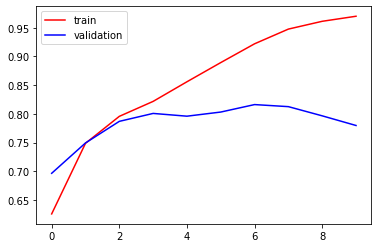

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

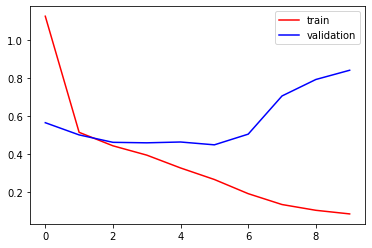

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
!git init

fatal: not a git repository (or any of the parent directories): .git
